In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
df= pd.read_csv(r'C:\\Users\\rames\\OneDrive\\Desktop\\namma\\DA_proj\\preprocessed_wosq.csv')
di = {1: "extreme poverty", 2: "moderate poverty",3:"vulnerable households",4:"non vulnerable households"}
df['Target']=df['Target'].map(di)
class_names=df.Target.unique()
a=df
class_names=list(class_names)
col1=list(df.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
zero_cols = [ col for col, is_zero in ((df == 0).sum() == df.shape[0]).items() if is_zero ]
col1=list(filter(lambda a: a not in data_notnum , col1))
#print(len(col1))
col1=list(set(col1) - set(zero_cols)) #removing columns with zero variance
X_sq = df[col1] # features for dataset without squared parameters
y_sq = df.Target #target

129


In [27]:
#len(col1)

128

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sq, y_sq, test_size=0.3, random_state=1)

In [35]:
len(X_train)

6689

In [56]:
def PCA_analyse(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    pca_trial=PCA()
    pca_trial.fit(X_train_std)
    plt.plot(np.cumsum(pca_trial.explained_variance_ratio_),label="Individual variance")
    print("As we can see that most of cumulative variances reaches 95% at around 80 dimension, we will use this for further training")
    pca = PCA(0.95)
    pca.fit(X_train_std)
    new=pca.fit_transform(X_train_std)
    plt.plot(np.cumsum(pca.explained_variance_ratio_),label="Cumulative variance")
    plt.xlabel('number of components')
    plt.ylabel('variance');
    plt.legend()
    print("original dimensions:" ,X_train_std.shape)
    print("After dimensionality reduction (upto 95% cumulative variance):",new.shape)
    train_test=[]
    train_test.append(pca.transform(X_train_std))
    train_test.append(pca.transform(X_test_std))
    
    return train_test

As we can see that most of cumulative variances reaches 95% at around 80 dimension, we will use this for further training
original dimensions: (6689, 128)
After dimensionality reduction (upto 95% cumulative variance): (6689, 81)


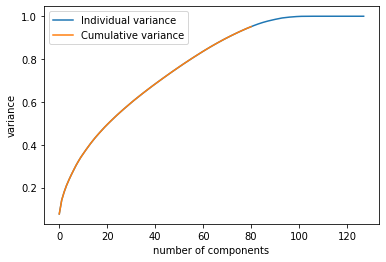

In [57]:
train,test=PCA_analyse(X_train,X_test)